
### 1. Instance vs Model based learning difference

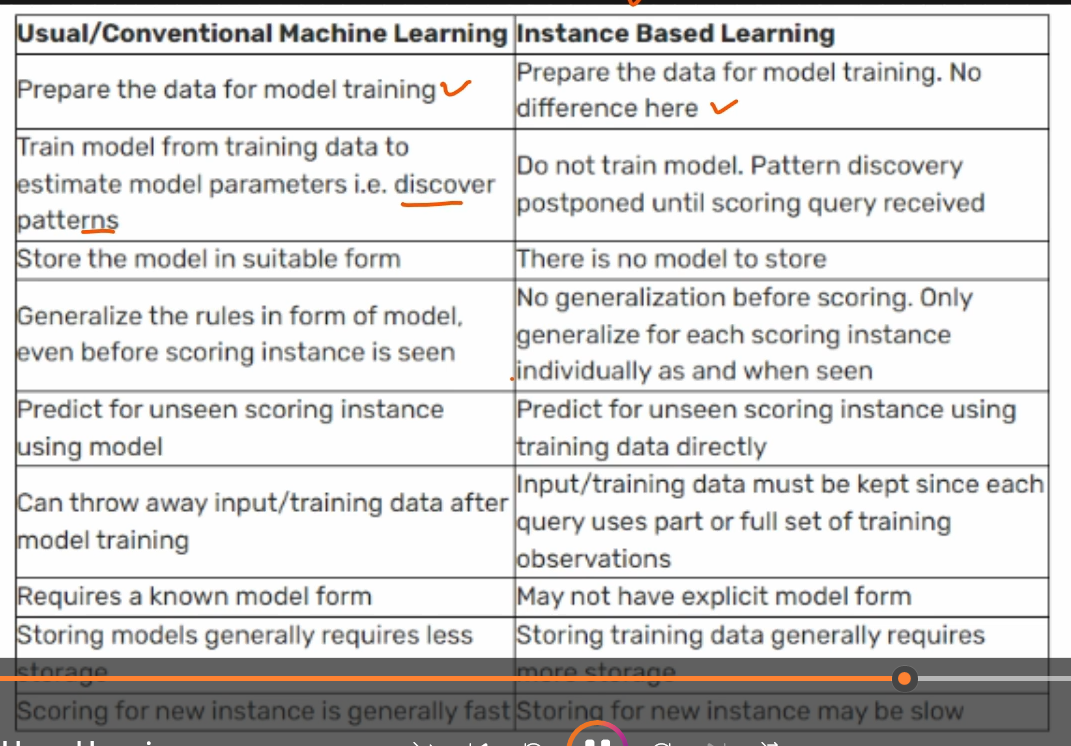

2. Batch learning 
![Screenshot 2025-10-05 135501.png](<attachment:Screenshot 2025-10-05 135501.png>)
## Online learning
![Screenshot 2025-10-05 135741.png](<attachment:Screenshot 2025-10-05 135741.png>)
 ## It chops data into the pieces mini batches so that learning can be done 
 ![Screenshot 2025-10-05 135804.png](<attachment:Screenshot 2025-10-05 135804.png>)
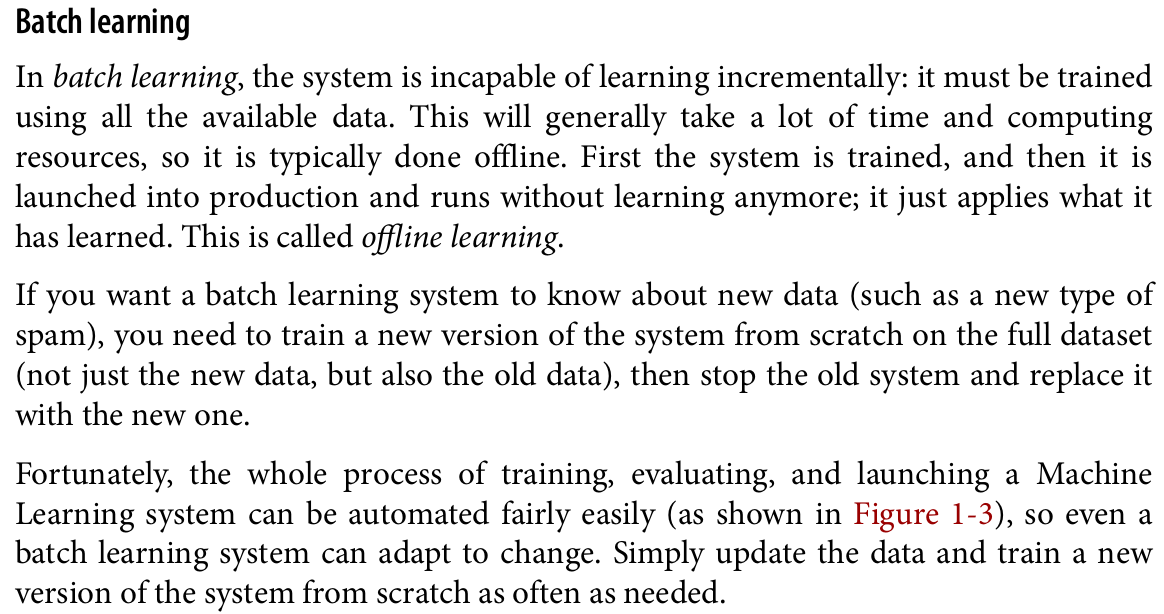
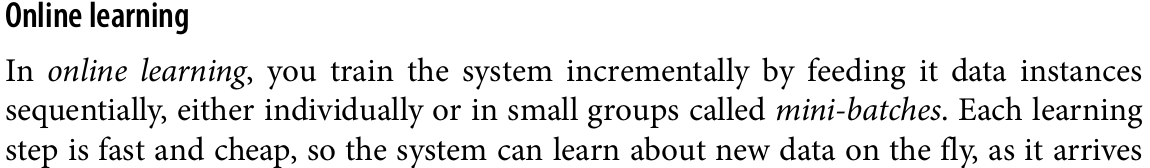
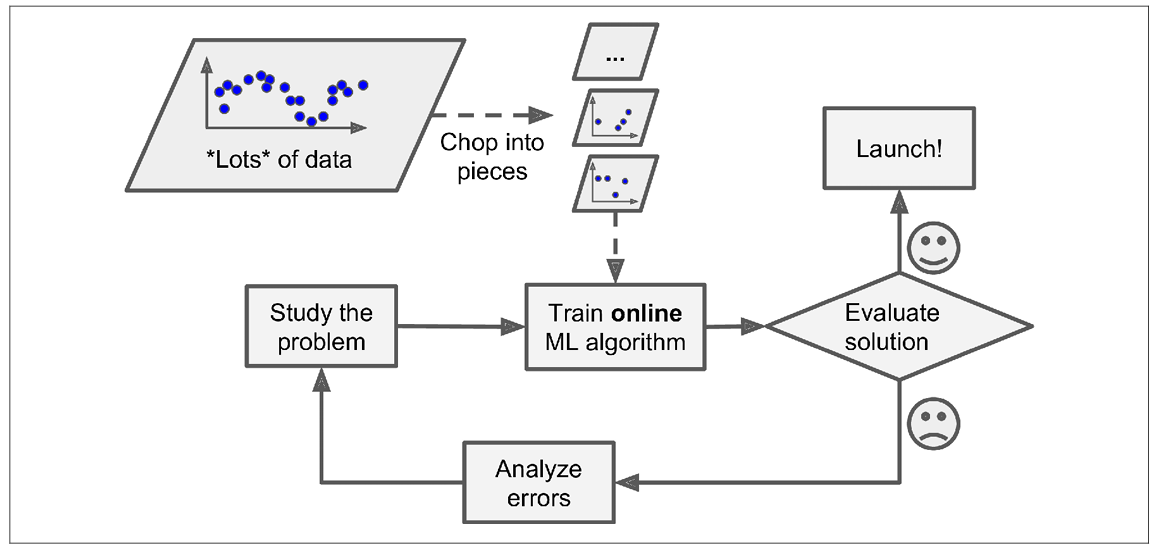

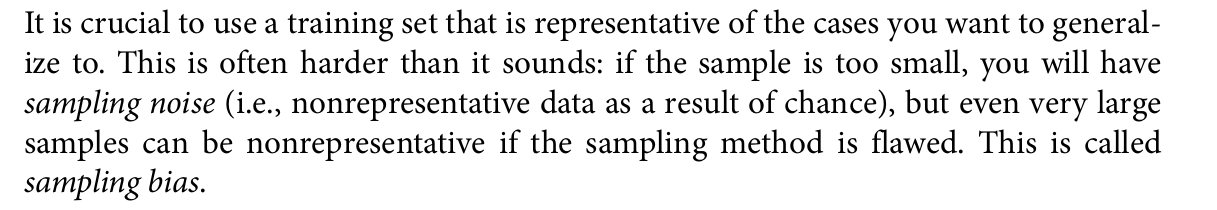
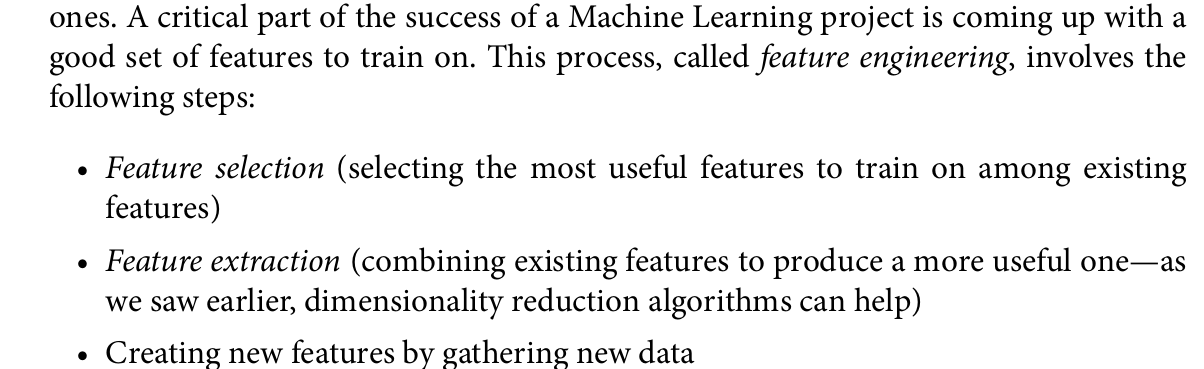

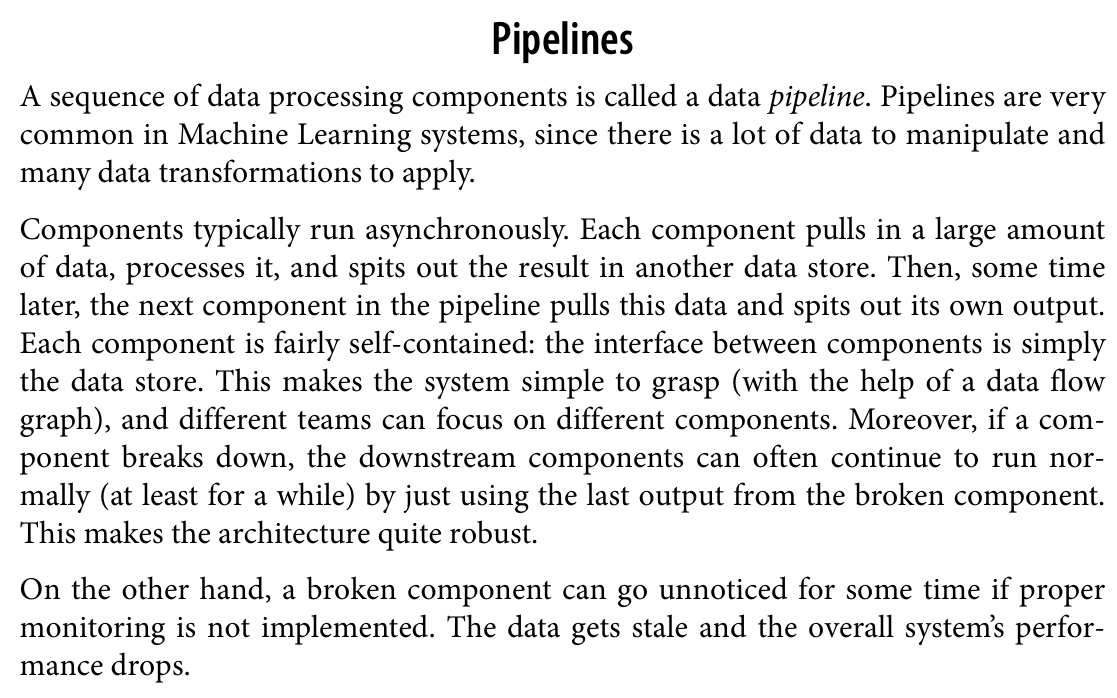

LinearRegression(

    fit_intercept=True,

    copy_X=True,

    n_jobs=None,
    
    positive=False
)


| Parameter         | Meaning                    | When to change                                    |
| ----------------- | -------------------------- | ------------------------------------------------- |
| **fit_intercept** | Adds bias term             | Set False only when data already mean-centered    |
| **copy_X**        | Makes copy of X            | Default fine, change only for memory optimization |
| **n_jobs**        | CPU cores to use           | Use -1 to speed large dataset training            |
| **positive**      | Restricts coefficients ≥ 0 | Useful in economics, medicine, physical models    |


In [2]:
## Linear regression 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
df=pd.read_csv('datasets/heightvsweight.csv')



In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


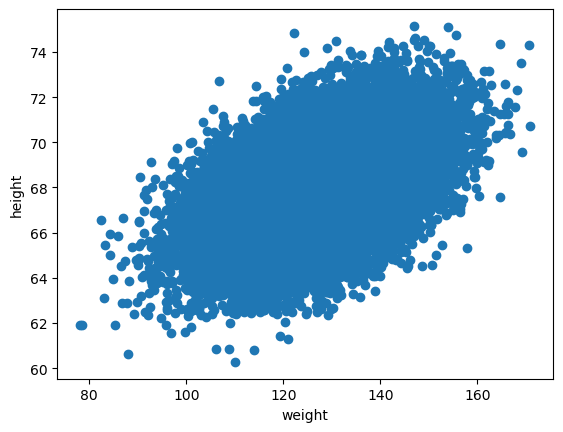

In [5]:
## scatter plot
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()


In [6]:
### Correlation :- tells whether they are positively connected or negativley connected 
df.drop(columns=["Index"],inplace=True)
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [7]:
### Seaborn for visualization
# Pair Plots 
# A pair plot is a data visualization technique used to understand relationships between multiple numerical variables in a dataset.
# What a pair plot shows
# Scatter plots for every pair of variables
# Distribution (histogram / KDE) of each variable on the diagonal
# Helps detect correlation, patterns, clusters, and outliers.
import seaborn as sns
sns.pairplot(df)

In [8]:
##  Independanta dn dependant features 
X=df[['Weight(Pounds)']]       ## independant features should be data framae or 2 dimensions 
type(X)                      ## we should take x=[[data]] for making it data frame or it should be always data frame not the series
Y=df['Height(Inches)'] # this can be in series or 1d array


In [9]:
## train test split 
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [11]:
X_train.shape

(18750, 1)

In [12]:
## standardization
from sklearn.preprocessing import StandardScaler
X

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [13]:
## as we all know different features in the data have different units and ranges that is height in inches , weight in pounds . so many ml models assumme comparable scaled instead of scaling the features dominante in the data . 
# by this distance and gradient calculations becomes biased 
# standscaler =x-u/sigma(standard deviation)
# we want to use same scale on each test data which we used on the train data . 
# mean and standard deviation from the train data will transform the test data .
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) ## 
X_train

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [14]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [15]:
##### applying simple linear regeresion

# n_jobs=None means 1 cpu core , -1 means all cpu cores , n means n  cpu cores  for computation
#fit_intercept (bool):
# Boolean input (True / False) — decides whether to calculate the intercept.
# copy_X (bool):
# Boolean input — whether to copy the input feature matrix X.
# n_jobs (int or None):
# Integer (-1, 1, 2, …) or None — specifies number of CPU cores.
# positive (bool): forces all coeffficients of model to be positive or not .
# Boolean input — enforces non-negative coefficients.
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1,positive=False)

In [16]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [17]:
print("coefficient or slope :",regression.coef_ )
print("Intercept:",regression.intercept_)

coefficient or slope : [0.94883892]
Intercept: 67.9938252704


In [18]:
### plot training data best fit line'
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),color="red") ## this is how we can change the data in the prdiction of the output 



### Prediction of the test data
predicted height output =  intercept +coef_(Weights)
y_pred_test=65.4364+1.24(X_test)

In [19]:
#### prediction of test data
y_pred=regression.predict(X_test)
y_pred

array([68.58261344, 66.76157097, 68.7214503 , ..., 68.69540615,
       66.88567232, 67.99616317])

In [20]:
## performancee metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [21]:


mse = mean_squared_error(Y_test,y_pred)
print("MSE:", mse)
mae=mean_absolute_error(Y_test,y_pred)
print("mae",mae)
rmse=np.sqrt(mse)
print("rmse",rmse)


MSE: 2.733380799373099
mae 1.3166150322297803
rmse 1.6532939240719113


# R Square 
### formula 
### R^2 = 1-SSR/SST
### R^2 = coefficient of determination SSR  = sum  of squares ### of residuals SST = Total sum of squares

In [22]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print("r2 square of the prediction is ", score)

r2 square of the prediction is  0.25926439414284275


### Adjusted R^2 method 
Where 
R2 : The R2 of the model n : The number of observations K : the number of the predictor variables 


In [23]:
## displaying adjusted R2 squared 
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


0.25914583850810247

In [24]:
import statsmodels.api as sm


In [25]:
models=sm.OLS(Y_train,X_train).fit()

In [26]:
prediction=models.predict(X_test)
print(prediction)


[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [27]:
print(models.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Wed, 24 Dec 2025   Prob (F-statistic):                      0.0561
Time:                        02:26:46   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
#### prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.50061832])

## Advertising Data Linear Regression Model

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("datasets/Advertising.csv")

In [31]:
df.head()
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [32]:
df.drop(columns=['Unnamed: 0'],inplace=True)

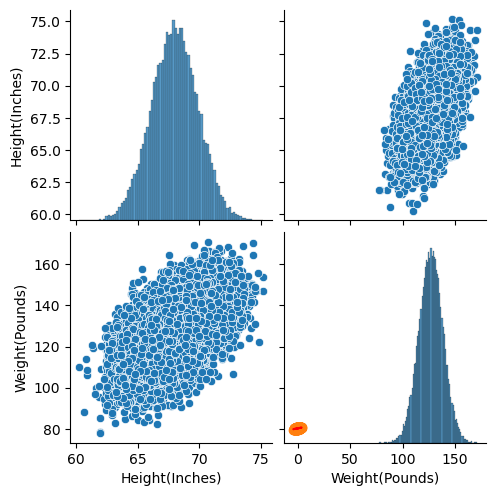

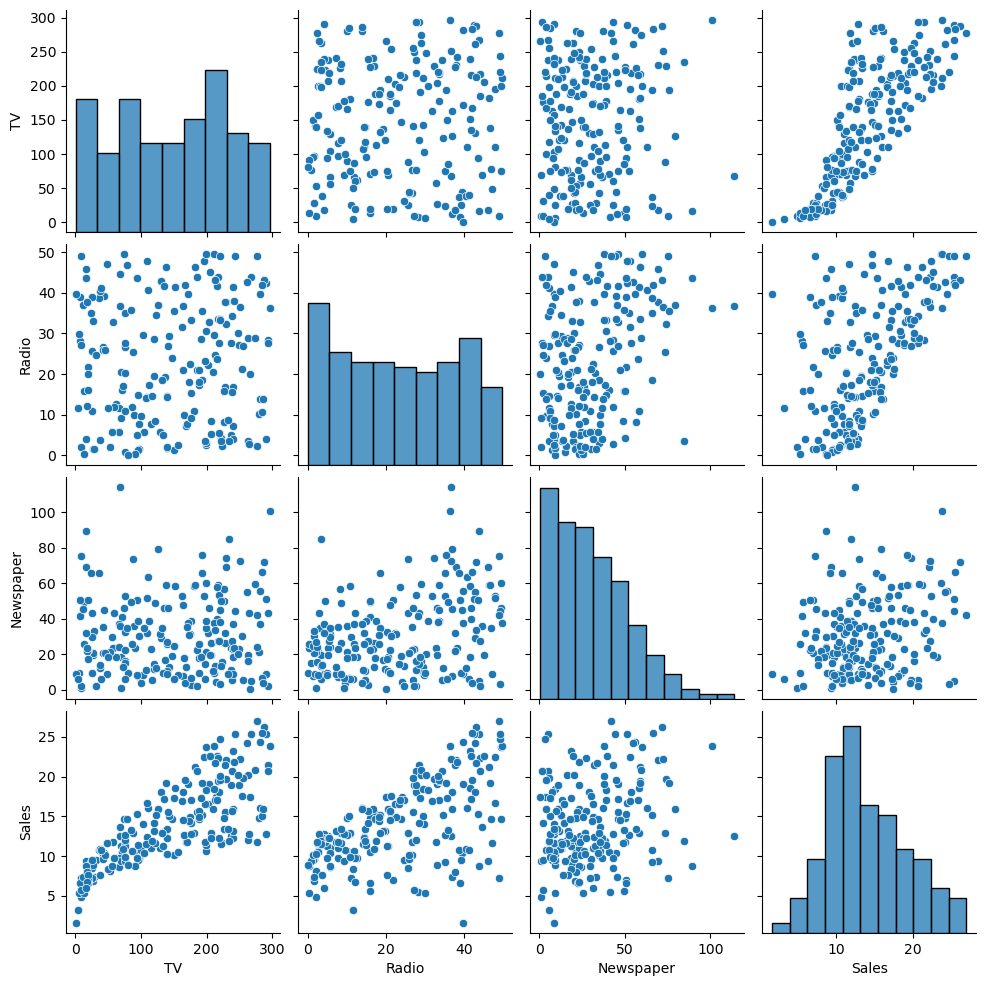

In [33]:
import seaborn as sns 
sns.pairplot(df)
plt.show()

In [34]:

df.corr()
## we can remove the feature of newspaper for checking the sales

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


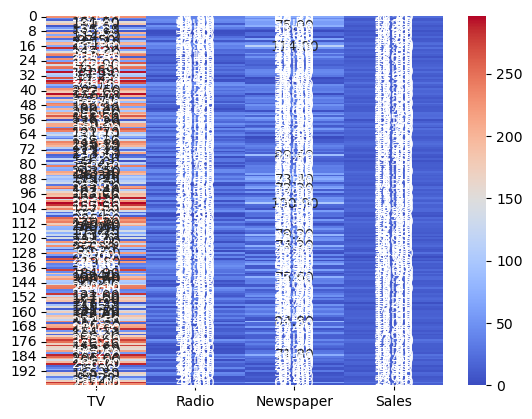

In [35]:
sns.heatmap(df,annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

In [36]:
df.dropna(inplace=True)

In [37]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [38]:
df.isna

<bound method DataFrame.isna of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [39]:
df.isnull().sum

<bound method DataFrame.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [40]:
print((df==' ').sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [42]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


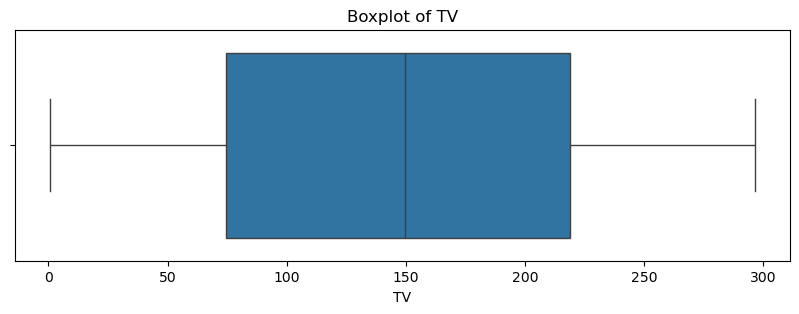

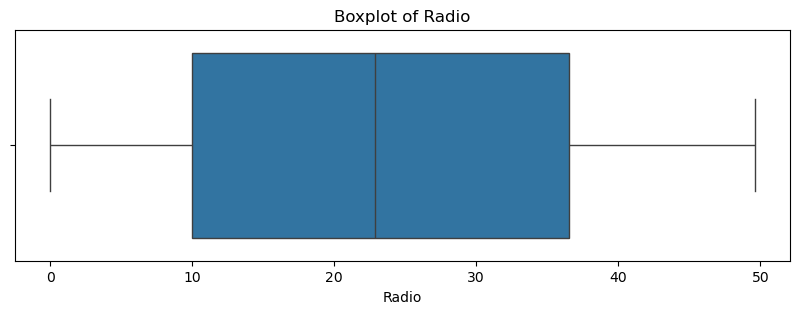

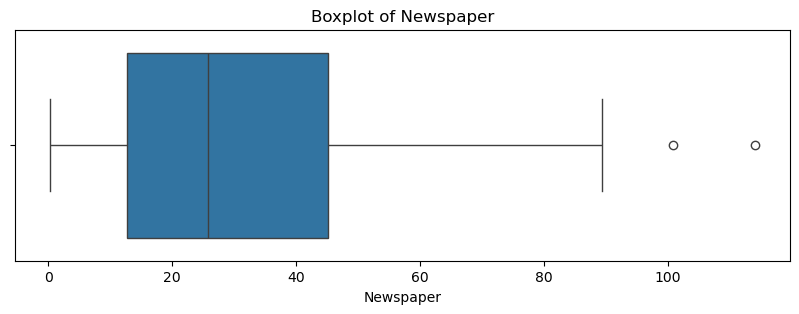

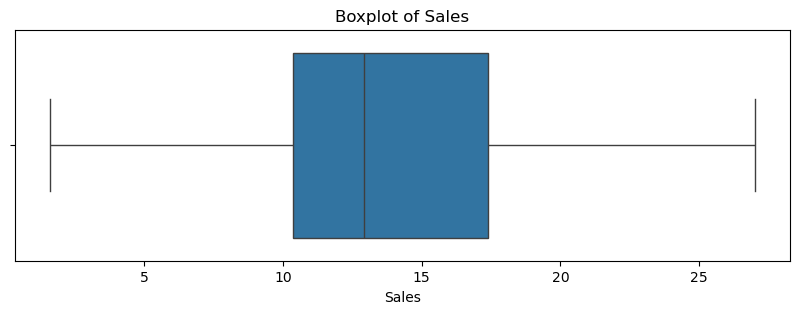

In [43]:

# For numerical columns
## Outliers
# a) Boxplot
# Shows median, quartiles, and whiskers.
# Points outside whiskers = potential outliers.
for col in df.select_dtypes(include='number'):
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [44]:
# b) Z-Score ( statistical method)
# Measures how many standard deviations a point is from the mean.
# Threshold typically: |z| > 3 → outlier.
from scipy import stats
for col in df.select_dtypes(include="number"):
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    print(outliers)
    


Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [45]:
for col in df.select_dtypes(include="number"):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(outliers)
    ### modified z score 
    median = df[col].median()
    MAD = np.median(np.abs(df[col] - median))
    modified_z = 0.6745 * (df[col] - median) / MAD
    outliers = df[np.abs(modified_z) > 3.5]
    print(outliers)


Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8
      TV  Radio  Newspaper  Sales
16  67.8   36.6      114.0   12.5
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [46]:
df.value_counts

<bound method DataFrame.value_counts of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [47]:

df['spending']=df['Newspaper']+df['TV']+df['Radio']
df.drop(columns=['Newspaper','TV','Radio'],inplace=True)
df.drop(index=[16,101])

,Sales,spending
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0
...,...,...
195,7.6,55.7
196,9.7,107.2
197,12.8,192.7
198,25.5,391.8


In [48]:
x=df.drop(columns=['Sales'])

In [49]:
y=df['Sales']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_Train,Y_Test=train_test_split(x,y,test_size=0.3,random_state=41)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
Y_train.shape


(18750,)

In [53]:
lr.fit(X_train_s,Y_Train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:

y_pred=lr.predict(X_test_s)

In [55]:
print("lr Intercept",lr.intercept_)
print("lr slope",lr.coef_)

lr Intercept 14.258571428571432
lr slope [4.43387812]


In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_squared_error(Y_Test,y_pred))
print(mean_absolute_error(Y_Test,y_pred))

6.5437682575675735
1.8267046378457712


In [57]:
print("rmse for lr model",np.sqrt(mean_squared_error(Y_Test,y_pred)))

rmse for lr model 2.5580790170687795


In [58]:
from sklearn.metrics import r2_score
print("R2 score for lr model",r2_score(Y_Test,y_pred))

R2 score for lr model 0.7677870417966066


| R² value      | Meaning                 | Judgment                 |
| ------------- | ----------------------- | ------------------------ |
| **1.0**       | Perfect predictions     | Unrealistic in real data |
| **0.8 – 0.9** | Explains most variation | Excellent                |
| **0.6 – 0.8** | Strong relationship     | Good                     |
| **0.4 – 0.6** | Moderate signal         | Acceptable               |
| **0.2 – 0.4** | Weak                    | Poor                     |
| **0.0**       | Same as predicting mean | Useless                  |
| **< 0**       | Worse than mean         | Broken model             |


In [59]:
lr.score(X_train_s,Y_Train)  ### r2 scoree

0.7437961734929635

In [60]:
lr.score(X_test_s,Y_Test)

0.7677870417966066

In [62]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,X_train_s,Y_Train,cv=5)
print(scores)
scores.mean()

[0.73057869 0.71059744 0.81185244 0.69936975 0.63518189]


0.717516043565742